Do your work for this exercise in a jupyter notebook or python script named cross_validation.

Use the cross validation techniques discussed in the lesson to figure out what kind of model works best with the cars dataset used in the lesson.

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from pydataset import data

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [2]:
#grab data
df = data("mpg")
df.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [3]:
#change trans columns to auto and manual
df["trans"]=np.where(df.trans.str.startswith("auto"),"auto", "manual")

In [4]:
df.trans.unique()

array(['auto', 'manual'], dtype=object)

### Model

In [5]:
#split into x and y
X= df[["displ","year","cyl","cty","hwy"]]
y= df.trans

In [6]:
#split data
#train and test
X_train,X_test, y_train,y_test = train_test_split(X,y, test_size = 0.2, random_state =123)

In [7]:
#split data train and validate
X_train,X_val, y_train, y_val = train_test_split(X_train,y_train, test_size = 0.3, random_state = 124)

In [8]:
#check split
X_train.shape,X_val.shape,X_test.shape

((130, 5), (57, 5), (47, 5))

In [9]:
#import cross val
from sklearn.model_selection import cross_val_score

In [11]:
#create tree
tree = DecisionTreeClassifier(max_depth = 4, random_state=123)

In [12]:
#cross val score
cross_val_score(tree,X_train,y_train, cv = 5)

array([0.57692308, 0.61538462, 0.73076923, 0.65384615, 0.73076923])

In [13]:
#average of cv score
cross_val_score(tree,X_train,y_train,cv=5).mean()

0.6615384615384615

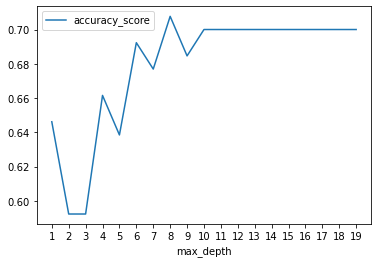

In [14]:
#we will plot for best max_depth
result = []
for i in range(1,20):
    tree = DecisionTreeClassifier(max_depth = i, random_state = 123)
    score = cross_val_score(tree,X_train,y_train, cv=5).mean()
    result.append([i, score])
    
pd.DataFrame(result, columns = ["max_depth", "accuracy_score"])\
    .set_index("max_depth").plot(xticks = range(1,20))
plt.show()

In [15]:
#from the plot, we can deduce 8 as optimal max_depth

### Grid Search

In [16]:
#import
from sklearn.model_selection import GridSearchCV

In [27]:
#create object
tree = DecisionTreeClassifier(random_state = 123)

In [37]:
#set parameters to optimize
params = {"max_depth" : range(1,21),
          "min_sample_leaf" : range(1,11),
          "criterion" : ["gini","entropy"]}


In [39]:
#create grid object
grid = GridSearchCV(tree,params, cv = 4)

In [41]:
#fit
#grid.fit(X_train,y_train)